# this version applies mask and attention to images to help network learns the walls and then create realistic walls.

# Project Summary: Microscopy Domain Wall Classification & Synthesis

🔬 Goal:

To simulate and classify ferroelectric domain wall configurations in YMnO₃ using:

Multi-task learning

Conditional GANs for synthetic data generation


### 1. 🏷️ Domain Class Definition (5-Class System)
"""
Label	Class Name	                 Type	             Integer         
HH	    Head-to-head domain wall	Symmetry-invariant	0              
TT	    Tail-to-tail domain wall	Symmetry-invariant	1              
TDW	    Mixed tail-domain-wall	    Symmetry-invariant	2             
UP	    Single-domain, upward polarized	Symmetry-breaking	3            
DN	    Single-domain, downward	    Symmetry-breaking	4  
"""

### 2. 🏗️ Synthetic Image Generation Pipeline

You built a data simulator using pymatgen, gaussian_filter, and STEM rendering to generate:

Realistic domain wall projections

Augmented images with gamma and noise

Labels embedded in filenames

Each image was saved with a label in the filename like:     
YMnO3_TTdz+0.0050aug01.png

### 3. 🔢 Label Inference and Encoding

def infer_class_from_filename(filename):
    ...
def label_to_index(label):
    ...
def label_to_onehot(label):
    ...
These map filenames → class strings → indices or one-hot encodings.

### 4. 🧠 Multi-Task Classifier (CNN + Polarization)

You built a dual-head CNN to predict:

Domain wall type (3 classes)

Polarization state (UP/DN → 2 classes)

Training loop tracked:

Loss

Accuracy (per task)

Confusion matrices

Misclassified examples

### 6. 🧬 Conditional GAN Pipeline
🎯 Goal:

To generate synthetic domain wall images for augmentation or visualization.

📦 Components:

ConditionalGenerator256: generates 256×256 grayscale images

ConditionalDiscriminator256: class-conditional real/fake discriminator

Training:

BCE loss + label smoothing

Real/fake + class-aware conditioning

Image grid output per epoch




# 🎯 Strategic Benefits of Your Project

This project sits at the intersection of materials science, deep learning, and data simulation, and offers clear benefits across scientific research, ML model development, and tooling/infrastructure.

## 1. 🧪 Scientific Insight & Hypothesis Testing
   
Domain: Ferroelectricity, Materials Physics

You're simulating domain wall structures in hexagonal YMnO₃, a complex ferroelectric material with known topological defects and phase transitions.

Your system enables:

Controlled generation of different wall types (e.g. tail-to-tail, stepped).

Synthetic STEM image creation, mimicking realistic experiments.

Visualization of polarization fields, enabling better interpretability.

✅ Value: Enables high-throughput hypothesis testing about defect interactions, wall types, and their energetic or functional significance — without requiring new experimental synthesis.

## 2. 🤖 Machine Learning for Inverse Design

Domain: Deep Learning + Physics-Informed Learning

You’re training conditional Pix2Pix-style GANs to learn a mapping from displacement → STEM image.

This is a step toward inverse design: e.g., given a desired domain structure, generate or optimize the atomic displacements.

✅ Value: Demonstrates how deep generative models can bridge simulation and experiment, potentially accelerating materials discovery and design.

## 3. 🏭 Synthetic Data as a Substitute for Scarce Experimental Data

Domain: Data-Centric ML / Self-Supervised Pretraining

STEM imaging is expensive, and labeling domain wall types is non-trivial.

Your synthetic pipeline generates:

Labeled domain images,

Paired input-output datasets,

Displacement maps with known ground truth.

✅ Value: Acts as a domain-specific pretraining tool for real-world datasets — like transfer learning from synthetic → real data.

## 4. ⚙️ Flexible Simulation + ML Infrastructure

Domain: Research Software Engineering

You’ve created modular components:

core/: physics-informed simulation,

ml_utils/: augmentation, datasets, transforms,

models/: attention, FiLM, U-Net-based architectures.

✅ Value: Sets up a research-ready, reproducible pipeline that can be extended to:

Other ferroelectrics (e.g. BiFeO₃, PbTiO₃),

Different microscopy modalities (e.g., PFM, TEM),

Other generative models (diffusion, NeRF-like inverse renderers).

## 5. 📈 Strategic Publication and Collaboration Opportunities

You can position this work in:

Topical journals: Nature Communications, npj Computational Materials, Physical Review Materials.

ML-for-science conferences: NeurIPS workshops, ICML, ICLR Applied Science tracks.

✅ Value: Bridges experimental materials science and modern deep learning — an active area of funding and collaboration (e.g. at Google Brain, Berkeley Lab, etc.)


## 6. Classification Workflow


### **Goal**
Classify STEM images of hexagonal YMnO₃ domain structures into **UP**, **DN**, and **typeC-DW** classes, leveraging synthetic pretraining + domain adaptation to real experimental data.

---

### **Pipeline Overview**

1. **Base Model**
   - Architecture: `EfficientNetSpatialAttention`  
   - Initialized from **synthetic-pretrained weights** generated on large, labeled synthetic STEM dataset.

2. **Fine-Tuning Strategy (K-Fold)**
   - **Stratified K-Fold cross-validation** on small labeled real dataset (e.g., 5 folds).
   - For each fold:
     - Warm-up classifier head (`EPOCHS_WARMUP`)  
     - Fine-tune all layers (`EPOCHS_FINETUNE`)
     - Save **best checkpoint per fold**.
   - **Ensemble prediction** from all fold models for more stable outputs.

3. **Inference on Unlabeled Real Data**
   - Ensemble generates:
     - Predicted class per image (`final_preds`)
     - Confidence scores (`final_conf`)
   - **Confidence filtering**:
     - Keep only predictions with `confidence ≥ CONF_THRESHOLD` (default 0.85)
     - Produces **pseudo-labeled set** (`pseudo_image_paths`, `pseudo_labels`)

4. **Self-Training / Domain Adaptation**
   - Merge gold-labeled real dataset + high-confidence pseudo-labeled set.
   - Stratified train/validation split.
   - Retrain a **final model** starting from best fold weights.
   - Use **EMA (Exponential Moving Average)** to stabilize weights during training.
   - Save best-performing retrained model.

5. **Final Predictions**
   - Run retrained model on held-out inference dataset.
   - Save numeric predictions, class names, and confidence scores to CSV.
   - Visualizations:
     - Class distribution
     - Confidence histograms
     - Example grids per class
   - Optionally organize images into folders by predicted class.




## 🔑 Final Summary

Category	Strategic Benefit

Materials Science	Enables exploration of exotic domain wall behaviors using first-principles-based logic    
ML for Physical Systems	Pushes forward generative modeling and inverse problems in structured scientific domains     
Synthetic Data Utility	Provides curated, labeled data for pretraining, data augmentation, and downstream fine-tuning      
Software Architecture	Enables extensibility, reproducibility, and collaboration within a larger ML-for-science ecosystem     
Publication & Impact	Highly publishable in ML, physics, or interdisciplinary journals and grants      

# Step 1: Install and Import Necessary Packages

In [1]:
!pip install pymatgen --quiet
!pip install matplotlib
!pip install torchinfo timm
!pip install pytorch-msssim
!pip install kornia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.5 MB/s eta 0:00:00
   

In [ ]:
import sys
sys.path.append("/kaggle/input/ymno3-py-files")

# Project imports (absolute, using package name)
from domain_wall_generation.physics.core.domain_walls import (
    generate_tail_to_tail_domain_wall,
    generate_type_A_tdw,
    generate_type_c_dw,
    generate_type_d_dw,
)
from domain_wall_generation.physics.core.y_ions import get_y_ions
from domain_wall_generation.physics.core.displacement import (
    generate_signed_displacement_map,
    generate_displacement_map,
    batch_generate_displacement_maps,
)
from domain_wall_generation.physics.core.utils import (
    render_stem_image,
    show_stem_image,
    apply_image_augmentation,
)
from domain_wall_generation.config_labels import POLAR_LABELS

from domain_wall_generation.gan.ml_utils.dataset import (
    DisplacementToImageDataset,
    filter_dataset_by_classnames,
    RemappedDatasetWithFilenames,
)
from domain_wall_generation.gan.ml_utils.transforms import JointTransform
from domain_wall_generation.gan.ml_utils.visualization import (
    show_sample_displacements,
    visualize_attention,
    visualize_attention_overlay,
    visualize_latent_effect,
)
from domain_wall_generation.gan.ml_utils.losses import (
    curvature_loss,
    latent_diversity_loss,
)

from domain_wall_generation.gan.models.film import FiLM, LatentFiLM
from domain_wall_generation.gan.models.unet_blocks import (
    UNetDown,
    UNetUp,
    UNetUp_latent,
    UNetDown_latent,
)
from domain_wall_generation.gan.models.discriminator import PatchGANDiscriminator
from domain_wall_generation.gan.models.base_generators.sharp_pix2pix import Pix2PixGenerator
from domain_wall_generation.gan.models.base_generators.wall_attention_generator import (
    Pix2PixGenerator_wall_attention,
    estimate_wall_mask,
    WallAttention,
)
from domain_wall_generation.gan.models.unified_router import UnifiedWallGenerator

from domain_wall_generation.gan.train import train_router
from domain_wall_generation.gan.train.train_pix2pix import train_pix2pix

from domain_wall_generation.gan.eval.plotting import (
    show_pix2pix_outputs,
    evaluate_pix2pix_quality,
    visualize_per_class_samples,
    validate_ssim,
    plot_ssim_distribution,
    plot_loss,
    plot_loss_components,
    plot_ssim_over_epochs,
)
from domain_wall_generation.gan.eval.image_generation import (
    generate_gan_images,
    visualize_stochastic_outputs,
)


In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from io import StringIO
import cv2
import random
import pandas as pd
import shutil
from IPython.display import FileLink
from sklearn.metrics import confusion_matrix, classification_report
from kornia.filters import Sobel, gaussian_blur2d
from scipy.ndimage import gaussian_filter

import torch
import torch.nn as nn
from torch import optim
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split, Subset
from pytorch_msssim import ssim
from torchvision import datasets, transforms, utils, transforms
import torchvision.transforms.functional as TF
from torchvision.utils import save_image, make_grid
from torchinfo import summary

from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [ ]:
#if colab
"""
from google.colab import drive
drive.mount('/content/drive')
"""

Mounted at /content/drive


In [ ]:
import sys
#sys.path.append('/content/drive/My Drive/domains/code')   #colab
sys.path.append("/kaggle/input/ymno3-py-files")           #Kaggle

from core.domain_walls import generate_tail_to_tail_domain_wall, generate_type_A_tdw, generate_type_c_dw, generate_type_d_dw
from core.y_ions import get_y_ions
from core.displacement import generate_signed_displacement_map, generate_displacement_map, batch_generate_displacement_maps
from core.utils import render_stem_image, show_stem_image, apply_image_augmentation
from config_labels import POLAR_LABELS

from ml_utils.dataset import DisplacementToImageDataset, filter_dataset_by_classnames, RemappedDatasetWithFilenames
from ml_utils.transforms import JointTransform
from ml_utils.visualization import show_sample_displacements, visualize_attention, visualize_attention_overlay, visualize_latent_effect
from ml_utils.losses import curvature_loss, latent_diversity_loss

from models.film import FiLM, LatentFiLM
from models.unet_blocks import UNetDown,UNetUp, UNetUp_latent, UNetDown_latent
from models.discriminator import PatchGANDiscriminator
from models.base_generators.sharp_pix2pix import Pix2PixGenerator
from models.base_generators.wall_attention_generator import Pix2PixGenerator_wall_attention, estimate_wall_mask, WallAttention
from models.unified_router import UnifiedWallGenerator

from train_GAN import train_router
from train_GAN.train_pix2pix import train_pix2pix

from eval.plotting import show_pix2pix_outputs, evaluate_pix2pix_quality, visualize_per_class_samples, validate_ssim, plot_ssim_distribution
from eval.plotting import plot_loss, plot_loss_components, plot_ssim_over_epochs

ModuleNotFoundError: No module named 'train_GAN'

In [ ]:
if torch.cuda.is_available():
    print("✅ GPU is available!")
    print("Device name:", torch.cuda.get_device_name(0))
else:
    print("❌ No GPU found.")

✅ GPU is available!
Device name: Tesla T4


In [ ]:
#Kaggle
#!rm /kaggle/working/YMnO3_proj_100_131.xyz
#!rm /kaggle/working/YMnO3_proj_100_supercell.cif
#Colab
#!rm -rf /content/drive/MyDrive/experiment_classifier_8.zip
#!rm -rf /content/drive/MyDrive/domains/real_disp_prediction_11

In [ ]:

#!unzip -q /content/drive/MyDrive/generated_disp_aug.zip -d /content/drive/MyDrive/domains/generated_disp_aug
#!unzip -q /content/drive/MyDrive/code.zip -d /content/drive/MyDrive/domains/code
#!unzip -q "/content/drive/MyDrive/unlabled displacement selected for inference.zip" -d "/content/drive/MyDrive/domains/unlabled displacement selected for inference"

#!cd /content/drive/MyDrive/code -r /content/drive/MyDrive/domain


In [ ]:
print(os.listdir('/content/drive/My Drive/domains/generated_disp_aug'))

['typeC-DW', 'UP', 'DN']


# Section I: Generate Synthetic Images

# 2- Synthetic Dataset for GAN Training

In [ ]:
label_names = sorted(os.listdir("/content/drive/My Drive/domains/stem_domains"))
label_map = {i: name for i, name in enumerate(label_names)}
print(label_map)

{0: 'DN', 1: 'HH', 2: 'TT', 3: 'UP', 4: 'typeA-TDW', 5: 'typeC-DW', 6: 'typeD-LDW'}


In [ ]:
label_names = sorted(os.listdir("/content/drive/My Drive/domains/stem_domains_disp"))
label_map = {i: name for i, name in enumerate(label_names)}
print(label_map)

{0: 'DN', 1: 'HH', 2: 'TT', 3: 'UP', 4: 'typeA-TDW', 5: 'typeC-DW', 6: 'typeD-LDW'}


In [ ]:
# Reverse lookup: class name → index
LABEL_INDICES = {k: v for k, v in POLAR_LABELS.items()}
print(LABEL_INDICES)

# === Usage ===
# For 128x128 (your default)
#transform_128 = JointTransform(p_flip=0.0, rotation=10, resize=(128, 128))

# For 256x256
transform_256 = JointTransform(p_flip=0.0, rotation=10, resize=(256, 256))

dis_to_img_dataset = DisplacementToImageDataset(
    image_root="/kaggle/input/synthetic-stem-fe-domains",  #colab: image_root="/content/drive/My Drive/domains/stem_domains",
    disp_root="/kaggle/input/displacement-map-ymno3",      #colab: disp_root="/content/drive/My Drive/domains/stem_domains_disp",
    transform=transform_256
)

# Choose the class you want to train on (e.g., 'typeC-DW')
wall_class_names = {"UP", "DN", "typeC-DW"}
#target_classes = ["UP", "DN", "typeA-TDW", "typeD-LDW", "HH", "TT" , "typeC-DW"]
target_classes = ["UP", "DN", "typeC-DW"]

n_classes = 3    # for later use
remapped_label_names = {i: class_name for i, class_name in enumerate(target_classes)}
selected_label_indices = {POLAR_LABELS[name] for name in target_classes} 

# Filter
filtered_subset, selected_indices = filter_dataset_by_classnames(dis_to_img_dataset, target_classes, LABEL_INDICES)
wall_dataset_remapped = RemappedDatasetWithFilenames(filtered_subset, dis_to_img_dataset, selected_label_indices)    #return disp, img, label, filename

#all_labels_print = torch.tensor([y for _,_, y,_ in wall_dataset_remapped])
#print("All unique labels in dataset:", torch.unique(all_labels_print))

gan_loader = DataLoader(wall_dataset_remapped, batch_size=32, shuffle=True)

# Inspect
for disp, img, labels, filenames in gan_loader:
    print("Unique labels:", torch.unique(labels))
    print("Sample filenames:", filenames[:5])
    break

Unique labels: tensor([0])
Sample filenames: ('YMnO3_C_dz+0.0140_sc1104_n70_g120_aug3.png', 'YMnO3_C_dz-0.0090_sc194_n100_g80_aug4.png', 'YMnO3_C_dz-0.0140_sc1104_n40_g120_aug2.png', 'YMnO3_C_dz-0.0090_sc1104_n70_g80_aug1.png', 'YMnO3_C_dz+0.0140_sc194_n70_g100_aug4.png')


In [ ]:
show_sample_displacements(wall_dataset_remapped, n_per_class=6, label_names = remapped_label_names)

['typeC-DW']

In [ ]:
for batch in gan_loader:
    x = batch[0]
    print("Batch image shape:", x.shape)
    break

Batch image shape: torch.Size([32, 1, 256, 256])


### Check Labels and Classes

In [ ]:
from collections import Counter
print("Remapped label indices and names:")
for new_idx, name in remapped_label_names.items():
    print(f"{new_idx}: {name}")

    
all_labels = []
for disp, img, labels, filenames in gan_loader:
    all_labels.extend(labels.tolist())

counts = Counter(all_labels)
print("Sample counts per remapped label index:")
for label_idx in sorted(counts.keys()):
    print(f"Label {label_idx} ({remapped_label_names[label_idx]}): {counts[label_idx]} images")
    

for disp, img, labels, filenames in gan_loader:
    for i in range(10):
        print(f"Filename: {filenames[i]}, Label: {labels[i].item()} ({remapped_label_names[labels[i].item()]})")
    break


for disp, img, labels, filenames in gan_loader:
    print("Batch labels:", labels.tolist())
    # If using one-hot or embedding, print that tensor too
    break

Filename: YMnO3_C_dz+0.0090_sc1144_n100_g120_aug0.png, Label: 0 (typeC-DW)
Filename: YMnO3_C_dz-0.0090_sc194_n100_g100_aug0.png, Label: 0 (typeC-DW)
Filename: YMnO3_C_dz+0.0090_sc183_n70_g120_aug0.png, Label: 0 (typeC-DW)
Filename: YMnO3_C_dz+0.0090_sc164_n40_g120_aug3.png, Label: 0 (typeC-DW)
Filename: YMnO3_C_dz+0.0140_sc1144_n40_g120_aug3.png, Label: 0 (typeC-DW)
Filename: YMnO3_C_dz-0.0140_sc164_n40_g100_aug1.png, Label: 0 (typeC-DW)
Filename: YMnO3_C_dz-0.0090_sc194_n70_g80_aug4.png, Label: 0 (typeC-DW)
Filename: YMnO3_C_dz-0.0090_sc194_n70_g80_aug0.png, Label: 0 (typeC-DW)
Filename: YMnO3_C_dz-0.0140_sc1104_n40_g100_aug2.png, Label: 0 (typeC-DW)
Filename: YMnO3_C_dz+0.0140_sc194_n70_g120_aug4.png, Label: 0 (typeC-DW)


# Section II: GAN for Image Generation

# Training

In [ ]:
#Kaggle

disp_root="/kaggle/input/displacement-map-ymno3"
image_root="/kaggle/input/synthetic-stem-fe-domains"
save_dir="/kaggle/working/complex_3_class"

#Colab
"""
disp_root="/content/drive/MyDrive/domains/stem_domains_disp"
image_root="/content/drive/MyDrive/domains/stem_domains"
save_dir="/content/drive/MyDrive/domains/complex_pix2pix"
"""

train_router.main(
    disp_root=disp_root,
    image_root=image_root,
    target_classes = target_classes, 
    save_dir=save_dir,
    epochs=80,
    batch_size=16,
    lambda_l1=30,  #60,
    lambda_edge=15,   #50, 
    lambda_ssim=10, #5.0,
    lambda_attn =3, # 0,
    lambda_div = 5.0,  # 10
    lambda_curv = 10., 
    noise_scale=0.4, #0.4, 0.8
)

✅ Saved training configuration to /content/drive/My Drive/domains/complex_pix2pix/config.txt
[Epoch 1/60] Batch 1/68 | D Loss: 0.7145 | G Loss: 38.6705 | Edge: 0.1630
[Epoch 1/60] Batch 51/68 | D Loss: 0.2248 | G Loss: 16.7185 | Edge: 0.0744
Epoch 1 SSIM: 0.1045
[Epoch 2/60] Batch 1/68 | D Loss: 0.4298 | G Loss: 18.6157 | Edge: 0.0846
[Epoch 2/60] Batch 51/68 | D Loss: 0.5133 | G Loss: 14.1608 | Edge: 0.0627
Epoch 2 SSIM: 0.1152
[Epoch 3/60] Batch 1/68 | D Loss: 0.3364 | G Loss: 14.3286 | Edge: 0.0613
[Epoch 3/60] Batch 51/68 | D Loss: 0.0825 | G Loss: 15.1279 | Edge: 0.0574
Epoch 3 SSIM: 0.1114
[Epoch 4/60] Batch 1/68 | D Loss: 0.0698 | G Loss: 16.1002 | Edge: 0.0608
[Epoch 4/60] Batch 51/68 | D Loss: 0.0267 | G Loss: 16.9572 | Edge: 0.0687
Epoch 4 SSIM: 0.1234
[Epoch 5/60] Batch 1/68 | D Loss: 0.0283 | G Loss: 17.5114 | Edge: 0.0662
[Epoch 5/60] Batch 51/68 | D Loss: 0.0259 | G Loss: 16.9538 | Edge: 0.0566
Epoch 5 SSIM: 0.1691
[Epoch 6/60] Batch 1/68 | D Loss: 0.0101 | G Loss: 18.158

In [ ]:
# Load and move generator to CUDA
generator = Pix2PixGenerator_wall_attention(in_channels=1, out_channels=1, n_classes=n_classes).to(device)
generator_path = os.path.join(save_dir, "generator.pth")
generator.load_state_dict(torch.load(generator_path))
 
generator.to("cuda")

# Visualize outputs
show_pix2pix_outputs(generator, wall_dataset_remapped, num_samples=8, n_classes=n_classes, device="cuda", save_dir = save_dir)


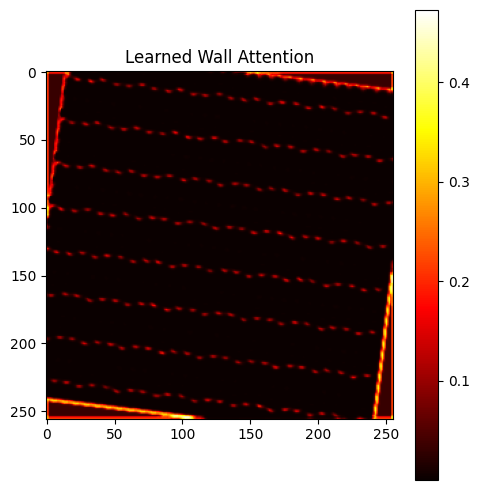

In [ ]:
batch = next(iter(gan_loader))  # (disp, img, label)
disp_map_batch, _, _, _ = batch
disp_map = disp_map_batch[0].unsqueeze(0)  # shape: [1, 1, H, W]
visualize_attention(generator, disp_map, save_dir = save_dir)

In [ ]:
#generator = Pix2PixGenerator_wall_attention(in_channels=1, out_channels=1, n_classes=n_classes)
#generator = Pix2PixGenerator(in_channels=1, out_channels=1, n_classes=n_classes).to(device)

#generator.load_state_dict(torch.load("complex_pix2pix/generator.pth"))
#generator.to("cuda")

# Visualize class-wise outputs
visualize_per_class_samples(generator, gan_loader, "cuda",n_classes=n_classes, num_samples= 5,  save_dir=save_dir)

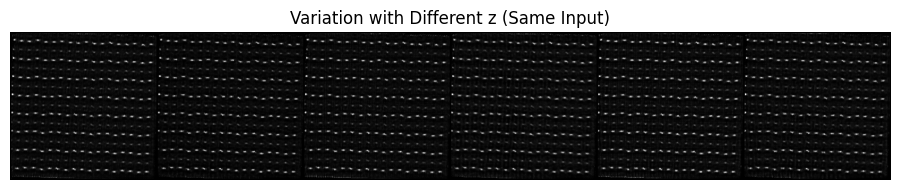

In [ ]:
# visualize_latent_effect
disp_map, real_img, label, _ = wall_dataset_remapped[5]  

# Visualize 6 outputs with different z
visualize_latent_effect(generator, disp_map, label, z_dim=8, save_dir= save_dir)

In [ ]:
# Evaluate and save quality metrics

evaluate_pix2pix_quality(generator, gan_loader, "cuda", save_dir=save_dir, threshold=0.85, n_classes = n_classes, max_samples=500, save_bad=True )

Class 0: SSIM mean = 0.4723, % > 0.85 = 0.0%


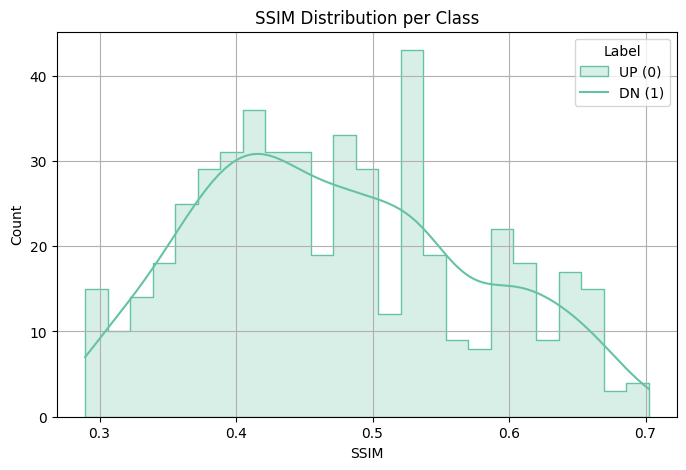

In [ ]:
# Plot SSIM distribution from saved evaluation results
csv_path = os.path.join(save_dir, "eval_results.csv")

plot_ssim_distribution(csv_path, save_dir=save_dir)

In [ ]:
shutil.make_archive(save_dir, 'zip', save_dir)
zip_path = save_dir + ".zip"

#Kaggle
FileLink(zip_path)

#Colab
#files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>